<a href="https://colab.research.google.com/github/tpezzin/mpca-rp/blob/main/ProblemaClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Classificação: Heart Disease

Dataset utilizado: [Heart Disease](https://www.kaggle.com/code/vijayravichandran06/heart-disease-classification-in-sklearn/data)

Baixei o dataset e salvei em meu Google Drive

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
df = pd.read_csv('/mydrive/RecPad/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset = np.asarray(df)
X = dataset[:,:-1]
y = dataset[:,-1:].astype(int)

In [6]:
y = np.squeeze(np.asarray(y))

In [7]:
set(y)

{0, 1}

In [8]:
X.shape, y.shape

((303, 13), (303,))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X, y)

ypred = modelo.predict(X)

In [10]:
mean_squared_error(y, ypred)

0.15181518151815182

In [11]:
modelo.intercept_

array([2.74570516])

In [12]:
modelo.coef_

array([[-0.00288395, -1.45071626,  0.81488868, -0.01835573, -0.00393341,
         0.00394263,  0.41318772,  0.02342686, -0.83669168, -0.54059431,
         0.50211222, -0.72743222, -0.84338982]])

In [13]:
def erroModeloAlteracaoIntercept(inter):
  erro = np.empty(inter.shape)

  for i in range(erro.shape[0]):
    modelo.intercept_ = inter[i]
    ypred = modelo.predict(X)
    mse = mean_squared_error(y, ypred)
    erro[i] = mse
  return erro

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(inters, erro):
  plt.ylabel("Erro")
  plt.xlabel("intercept")
  plt.plot(inters, erro)

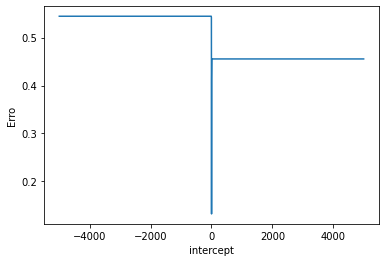

In [15]:
delta = 5000
intercepts = np.linspace((-2.74570516 - delta), (2.74570516 + delta), 2000)

erro = erroModeloAlteracaoIntercept(intercepts)

plot(intercepts, erro)

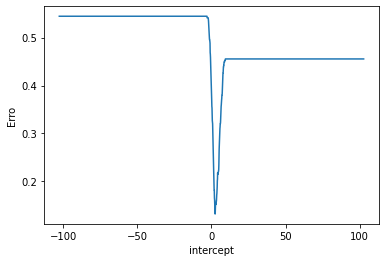

In [16]:
delta = 100
intercepts = np.linspace((-2.74570516 - delta), (2.74570516 + delta), 2000)

erro = erroModeloAlteracaoIntercept(intercepts)

plot(intercepts, erro)

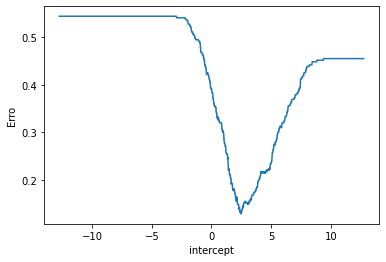

In [17]:
delta = 10
intercepts = np.linspace((-2.74570516 - delta), (2.74570516 + delta), 2000)

erro = erroModeloAlteracaoIntercept(intercepts)

plot(intercepts, erro)